# Actividad para minimizar el impacto del sobre-ajuste.

## Etapa 1: Definición de los datos.

Antes de comenzar definimos la base de datos de interés. Usaremos la base de datos IMBD que consiste en reseñas hechas a 25000 películas. La tarea que configura esta base de datos consiste en predecir si el comentario es positivo o negativo. ([Ver enlace](https://keras.io/api/datasets/imdb/))

Se cargan las librerías necesarias

In [ ]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt

Se carga la base de datos

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Se definen funciones para la visualización de la función de costo

In [ ]:
def evaluate(model, history):
    # Se evalúa el accuracy del modelo tanto en el conjunto de entrenamiento como 
    # en el de prueba.
    _, train_accuracy = model.evaluate(x_train, y_train)
    _, test_accuracy = model.evaluate(x_test, y_test)

    print(f"Trainining accuracy: {train_accuracy:.2f}")
    print(f"Testing accuracy: {test_accuracy:.2f}")

    # Se grafica la función de costo para los conjuntos de entrenamiento y 
    # prueba.
    plt.figure(figsize=(4, 3), dpi=160)

    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend()
    plt.show()

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
# Procesamiento de los datos.
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# Se definen los conjuntos de entrenamiento y prueba
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Se define la red neuronal.

model = models.Sequential([
  layers.Dense(16, activation='relu', input_shape=(10000,)),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/50
30/30 [==============================] - 3s 63ms/step - loss: 0.5160 - accuracy: 0.7977 - val_loss: 0.4085 - val_accuracy: 0.8453
Epoch 2/50
30/30 [==============================] - 1s 37ms/step - loss: 0.3151 - accuracy: 0.8995 - val_loss: 0.3168 - val_accuracy: 0.8807
Epoch 3/50
30/30 [==============================] - 1s 38ms/step - loss: 0.2329 - accuracy: 0.9251 - val_loss: 0.2807 - val_accuracy: 0.8888
Epoch 4/50
30/30 [==============================] - 1s 36ms/step - loss: 0.1827 - accuracy: 0.9421 - val_loss: 0.2965 - val_accuracy: 0.8796
Epoch 5/50
30/30 [==============================] - 1s 37ms/step - loss: 0.1502 - accuracy: 0.9513 - val_loss: 0.2896 - val_accuracy: 0.8850
Epoch 6/50
30/30 [==============================] - 1s 37ms/step - loss: 0.1230 - accuracy: 0.9627 - val_loss: 0.2889 - val_accuracy: 0.8860
Epoch 7/50
30/30 [==============================] - 2s 57ms/step - loss: 0.1037 - accuracy: 0.9696 - val_loss: 0.3272 - val_accuracy: 0.8791
Epoch 8/50
30

782/782 [==============================] - 2s 2ms/step - loss: 1.6960 - accuracy: 0.8433
Trainining accuracy: 0.94
Testing accuracy: 0.84


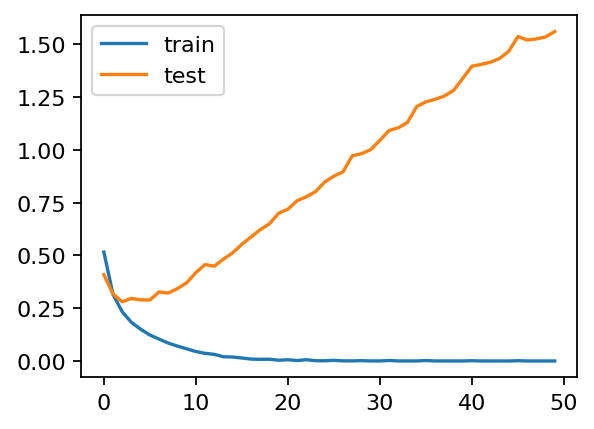

In [ ]:
evaluate(model, history)

El modelo que entrenemos presenta sobre ajuste. Así, debemos construir una bitácora donde reportemos los siguientes análisis.  
 
Indicar los elementos que tuvimos en cuenta para verificar que el modelo inicial se encuentra en sobreajuste. 
Modificar el modelo inicial con el fin de minimizar el impacto del sobreajuste y reportar los resultados obtenidos en términos de la función de pérdida. En particular debemos experimentar las siguientes variaciones: 
* Modelo inicial sin ninguna * modificación. 
* Modelo inicial añadiendo * regularización L2. 
* Modelo inicial añadiendo dropout. 
* Modelo que combine ambas estrategias de regularización. 